In [27]:
import tensorflow as tf
print(tf.__version__)
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

2.2.0
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information se

In [2]:
print(diabetes_dataset.keys())
print(diabetes_dataset['data'][0])
print(diabetes_dataset['target'][0])

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
151.0


In [3]:
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [4]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis = 0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)


(397, 10)
(45, 10)
(397,)
(45,)


In [6]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(units = 128, activation = 'relu', input_shape = (train_data.shape[1],)),
        Dense(units = 128, activation = 'relu'),
        Dense(units = 128, activation = 'relu'),
        Dense(units = 128, activation = 'relu'),
        Dense(units = 128, activation = 'relu'),
        Dense(units = 128, activation = 'relu'),
        Dense(units = 1)
    ])
    return model
model = get_model()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model
model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae', 'accuracy'])

In [9]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs = 100, validation_split = 0.15, batch_size = 64)

Epoch 1/100
6/6 [==============================] - 0s 38ms/step - loss: 1.0305 - mae: 0.8658 - accuracy: 0.0000e+00 - val_loss: 0.7856 - val_mae: 0.7535 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9317 - mae: 0.8256 - accuracy: 0.0000e+00 - val_loss: 0.6724 - val_mae: 0.7002 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.7048 - mae: 0.7194 - accuracy: 0.0000e+00 - val_loss: 0.5065 - val_mae: 0.5988 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5395 - mae: 0.5844 - accuracy: 0.0000e+00 - val_loss: 0.7431 - val_mae: 0.7032 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6074 - mae: 0.6315 - accuracy: 0.0000e+00 - val_loss: 0.5906 - val_mae: 0.6014 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5480 - mae: 0.5947 - accuracy: 

In [10]:
history.history.keys()

dict_keys(['loss', 'mae', 'accuracy', 'val_loss', 'val_mae', 'val_accuracy'])

In [11]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 3ms/step - loss: 0.9191 - mae: 0.7403 - accuracy: 0.0000e+00


[0.9191123843193054, 0.7402502298355103, 0.0]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

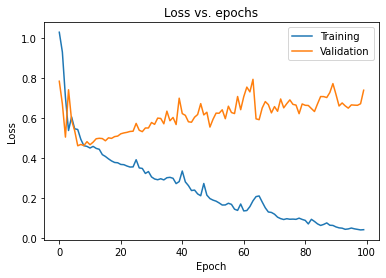

In [13]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [14]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [15]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [16]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5, 0.3)

In [17]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [18]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs = 100, validation_split = 0.15, batch_size = 64)

Epoch 1/100
6/6 [==============================] - 0s 26ms/step - loss: 1.0469 - mae: 0.8696 - val_loss: 0.8239 - val_mae: 0.7659
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0316 - mae: 0.8678 - val_loss: 0.8273 - val_mae: 0.7671
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0050 - mae: 0.8618 - val_loss: 0.7996 - val_mae: 0.7534
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9204 - mae: 0.8230 - val_loss: 0.7004 - val_mae: 0.7148
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.7692 - mae: 0.7485 - val_loss: 0.5739 - val_mae: 0.6624
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6443 - mae: 0.6584 - val_loss: 0.5366 - val_mae: 0.6041
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6254 - mae: 0.6368 - val_loss: 0.5221 - val_mae: 0.5860
Epoch 8/100
6/6 [==============================] - 0s 26ms/step - loss: 0.5943 - mae: 0.6248 - v

In [19]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 3ms/step - loss: 0.7064 - mae: 0.6468


[0.7063942551612854, 0.6468387842178345]

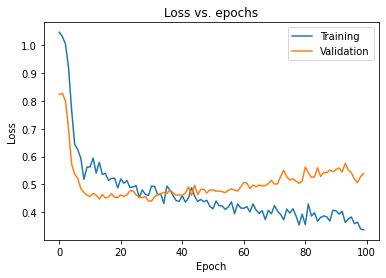

In [20]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 2)

In [22]:
# Re-train the unregularised model
unregularised_model = get_model()
unregularised_model.compile(optimizer = 'adam', loss = 'mse')
unreg_history = unregularised_model.fit(train_data, train_targets, epochs = 100, validation_split = 0.15,
                                        batch_size = 64, callbacks = [early_stopping])

Epoch 1/100
6/6 [==============================] - 0s 18ms/step - loss: 1.0354 - val_loss: 0.7935
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.9605 - val_loss: 0.6964
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7566 - val_loss: 0.5457
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5385 - val_loss: 0.6083
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5366 - val_loss: 0.4633
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4986 - val_loss: 0.4525
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4678 - val_loss: 0.4807
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.4536 - val_loss: 0.4812


In [23]:
# Evaluate the model on the test set
unregularised_model.evaluate(test_data, test_targets, verbose = 1)


2/2 [==============================] - 0s 3ms/step - loss: 0.7073


0.7073402404785156

In [24]:
# Re-train the regularised model
regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimizer = 'adam', loss = 'mse')
reg_history = regularised_model.fit(train_data, train_targets, epochs = 100,
                                   validation_split = 0.15, batch_size = 64, 
                                   callbacks = [early_stopping])


Epoch 1/100
6/6 [==============================] - 0s 24ms/step - loss: 1.0436 - val_loss: 0.7960
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0070 - val_loss: 0.7086
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9015 - val_loss: 0.5602
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.7261 - val_loss: 0.5143
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6499 - val_loss: 0.4978
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5767 - val_loss: 0.4997
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5539 - val_loss: 0.4798
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5146 - val_loss: 0.4834
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4948 - val_loss: 0.4723
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5158 - val_loss: 0.4540
Epoch 11/100
6/6 [==========

In [25]:
# Evaluate the model on the test set
regularised_model.evaluate(test_data, test_targets, verbose = 1)

2/2 [==============================] - 0s 2ms/step - loss: 0.7464


0.746429979801178

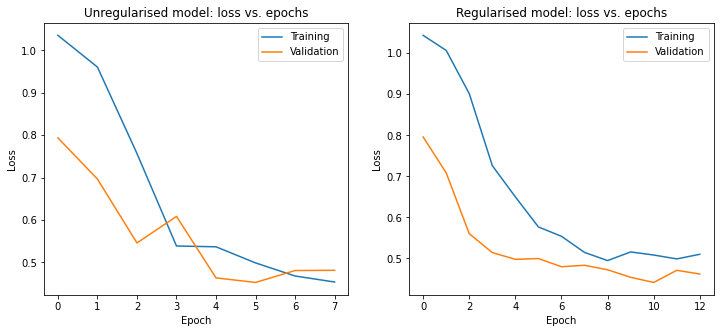

In [26]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()